## 4.2 Introduction<a id='4.2_Introduction'></a>

In this project, you’ll predict whether a customer is likely to churn (i.e., stop using a service). The goal is to preprocess the dataset, develop features, and train a classification model.

##  Imports<a id='4.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

Dataset Source is from kaggle - Telco Customer Churn Dataset

## Load Data<a id='4.4_Load_Data'></a>

In [4]:
data = pd.read_csv('/Users/satyaprakashchallagulla/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='Churn'>

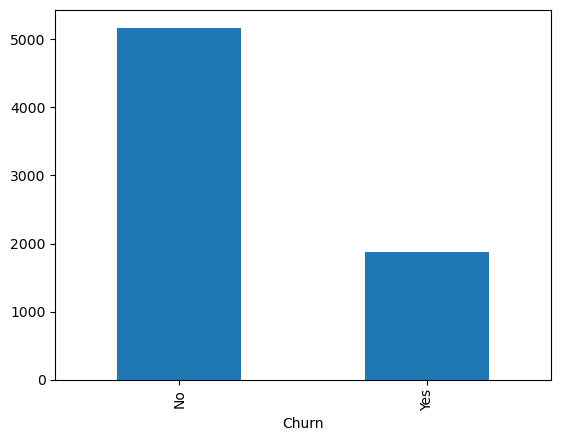

In [5]:
data.describe()
data['Churn'].value_counts().plot(kind='bar')

Preprocess the Data
	•	Handle missing values: Impute or drop missing data.
	•	Categorical data: Create dummy variables using get_dummies().
	•	Numeric data: Standardize columns like MonthlyCharges, TotalCharges, etc.

In [6]:


# Handle missing data (example: filling missing TotalCharges with mean)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Standardize numeric columns
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

Define Features and Target
	•	X: All columns except Churn.
	•	y: The Churn column (convert to binary: Yes = 1, No = 0).

In [7]:
X = data.drop("Churn_Yes", axis=1)  # Adjust based on your dummy encoding
y = data["Churn_Yes"]

Split the data into training and testing sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Train a Classification Model
	•	Use a classification algorithm like Logistic Regression, Decision Trees, or Random Forest.
	•	Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8005677785663591
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.92      0.87      1036
        True       0.68      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



Visualize Model Performance

Create visualizations such as:
	•	Feature importance (for tree-based models).
	•	ROC curve.

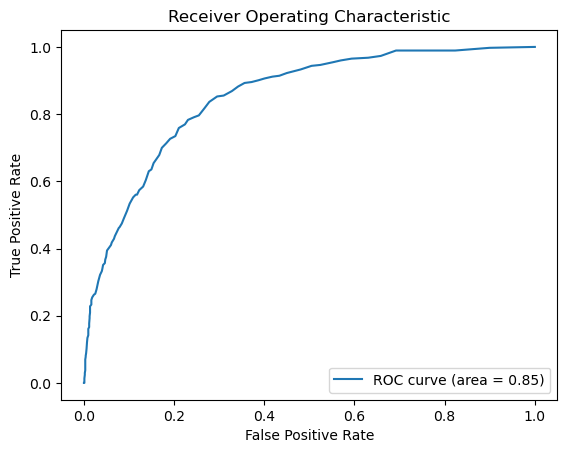

In [10]:


# Calculate probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

Modeling.
In this step I am going to model the above trained data into different models.I have selected 4 models.
1.Decision Tree.
2.Random Forest.
3.Gradient Boosting.

1.Decision Tree

In [11]:
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.7743080198722498


2.Random Forest

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8005677785663591


3.Gradient Boosting

In [13]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8112136266855926


Now I am doing the Hyper parameter Tuning i.e optimizing the models using the GridSearchCv technique.

1.GridsearchCv for decision Tree.

In [14]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
dt = DecisionTreeClassifier()

# Grid search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7871852053818671


2.GridsearchCv for Randomforest.

In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.7992524834476226


3.GridsearchCv for Gradient Boosting(Used the XGBoost in the gradient Boosting).

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state = 42)

# Grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best Cross-Validation Score: 0.8044017267112267


I choose Gradient boosting with XGBoost for predicting whether a particular customer is going to churn from the network or not.After using the 3 classification model the reason to choose the
Gradient boosting is it gives the better cross validation score and also very good accuracy when compared to other 2 models.I would like to explain it elaboratedly in the future documentation and also my future plans for this.